In [2]:
from scipy import*
from scipy.stats import norm 
import matplotlib.pyplot as plt

In [3]:
S0=100
E=104
T=2
r=-0.02
sigma=sqrt(0.15)

<ipython-input-3-1bcfa9ffd240>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sigma=sqrt(0.15)


## American and European call option using Jarrow-Rudd method parameters

In [4]:
def Eu_jr(S0,E,T,N,r,sigma):
    """
    Finding the prices of European call option using Jarrow-Rudd method parameters
    S0=100
    E=104
    T=2
    r=-0.2(call option)
    sigma=sqrt(0.15)->volatility
    """
    dt=T/N
    rho=r-0.5*sigma*sigma
    D=exp(rho*dt-sigma*sqrt(dt))
    U=exp(rho*dt+sigma*sqrt(dt))
    R=(exp(r*dt))
    q=(R-D)/(U-D)
    Vold=zeros(N+1)
    Vnew=zeros(N+1)
    for m in range (0,N+1):
        Vold[m]=max(S0*U**m*D**(N-m)-E,0)
    for j in range(N-1,-1,-1):
        for m in range(0,j+1):
            Vnew[m]=(q*Vold[m+1]+(1-q)*Vold[m])/R
        for m in range(0,j+1):
            Vold[m]=Vnew[m]
    return (Vnew[0])

In [5]:
def Americ_jr(S0,E,T,N,r,sigma):
    """
    Finding the prices of American call option using Jarrow-Rudd method parameters
    S0=100
    E=104
    T=2
    r=-0.2(call option)
    sigma=sqrt(0.15)->volatility
    """
    dt=T/N
    rho=r-0.5*sigma*sigma
    D=exp(rho*dt-sigma*sqrt(dt))
    U=exp(rho*dt+sigma*sqrt(dt))
    R=(exp(r*dt))
    q=(R-D)/(U-D)
    Vold=zeros(N+1)
    Vnew=zeros(N+1)
    for m in range(0,N+1):
        Vold[m]= max(E-S0*U**m*D**(N-m),0)  
    for j in range(N-1,-1,-1):
        for m in range(0,j+1):
            Vnew[m]=(q*Vold[m+1]+(1-q)*Vold[m])/R
            Vnew[m]=max(Vnew[m], max(E-S0*U**m*D**(j-m),0))
        for m in range(0,j+1):
            Vold[m]=Vnew[m]
    return(Vnew[0])

In [6]:
print('The European call option price is %8.5f.' % Eu_jr(S0,E,T,300,r,sigma))
print('The European call option price is %8.5f.' % Eu_jr(S0,E,T,400,r,sigma))
print('The European call option price is %8.5f.' % Eu_jr(S0,E,T,500,r,sigma))
print('The American call option price is %8.5f.' % Americ_jr(S0,E,T,300,r,sigma))
print('The American call option price is %8.5f.' % Americ_jr(S0,E,T,400,r,sigma))
print('The American call option price is %8.5f.' % Americ_jr(S0,E,T,500,r,sigma))

<ipython-input-4-37cf9afa1894>:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  D=exp(rho*dt-sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  D=exp(rho*dt-sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:13: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  U=exp(rho*dt+sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:13: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  U=exp(rho*dt+sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  R=(exp(r*dt))
<ipython-input-4-37cf9afa1894>:16: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Vold

The European call option price is 18.58863.
The European call option price is 18.57655.
The European call option price is 18.58253.
The American call option price is 26.83295.
The American call option price is 26.82087.
The American call option price is 26.82685.


## American and European call option using Leisen-Reimer method

In [7]:
def Eu_lr(S0,E,T,N,r,sigma):
    """
    Finding the prices of European call option using Leisen-Reimer method parameters
    S0=100
    E=104
    T=2
    r=-0.2(call option)
    sigma=sqrt(0.15)->volatility
    """
    if N%2 == 0:
        N=N+1
    dt = T/N
    R = (exp(r*dt))
    d1=(log(S0/E)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2=d1-sigma*sqrt(T)
    a1=((d1**2)/(N + 1/3 + 0.1/(N+1))**2)*(N+1/6)
    a2=((d2**2)/(N + 1/3 + 0.1/(N+1))**2)*(N+1/6)
    q1=0.5 + 0.5*sign(d1)*sqrt((1-exp(-a1)))
    q=0.5 + 0.5*sign(d2)*sqrt((1-exp(-a2)))
    U=(R*q1)/q
    D=(R-q*U)/(1-q)
    Vold=zeros(N+1)
    Vnew=zeros(N+1)
    for m in range(0,N+1):
        Vold[m]= max(S0*U**m*D**(N-m)-E,0)  
    for j in range(N-1,-1,-1):
        for m in range(0,j+1):
            Vnew[m]=(q*Vold[m+1]+(1-q)*Vold[m])/R
        for m in range(0,j+1):
            Vold[m]=Vnew[m]
    return(Vnew[0])

In [8]:
def Americ_lr(S0,E,T,N,r,sigma):
    """
    Finding the prices of American call option using Leisen-Reimer method parameters
    S0=100
    E=104
    T=2
    r=-0.2(call option)
    sigma=sqrt(0.15)->volatility
    """
    if N%2 == 0:
        N=N+1
    dt = T/N
    R = (exp(r*dt))
    d1=(log(S0/E)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2=d1-sigma*sqrt(T)
    a1=((d1**2)/(N + 1/3 + 0.1/(N+1))**2)*(N+1/6)
    a2=((d2**2)/(N + 1/3 + 0.1/(N+1))**2)*(N+1/6)
    q1=0.5 + 0.5*sign(d1)*sqrt((1-exp(-a1)))
    q=0.5 + 0.5*sign(d2)*sqrt((1-exp(-a2)))
    U=(R*q1)/q
    D=(R-q*U)/(1-q)
    Vold=zeros(N+1)
    Vnew=zeros(N+1)
    for m in range(0,N+1):
        Vold[m]= max(E-S0*U**m*D**(N-m),0)  
    for j in range(N-1,-1,-1):
        for m in range(0,j+1):
            Vnew[m]=(q*Vold[m+1]+(1-q)*Vold[m])/R
            Vnew[m]=max(Vnew[m], max(E-S0*U**m*D**(j-m),0))
        for m in range(0,j+1):
            Vold[m]=Vnew[m]
    return(Vnew[0])

In [9]:
print('The European call option price is %8.5f.' % Eu_lr(S0,E,T,300,r,sigma))
print('The European call option price is %8.5f.' % Eu_lr(S0,E,T,400,r,sigma))
print('The European call option price is %8.5f.' % Eu_lr(S0,E,T,500,r,sigma))
print('The American call option price is %8.5f.' % Americ_lr(S0,E,T,300,r,sigma))
print('The American call option price is %8.5f.' % Americ_lr(S0,E,T,400,r,sigma))
print('The American call option price is %8.5f.' % Americ_lr(S0,E,T,500,r,sigma))

<ipython-input-7-a4eec3dbab15>:13: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  R = (exp(r*dt))
<ipython-input-7-a4eec3dbab15>:14: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1=(log(S0/E)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
<ipython-input-7-a4eec3dbab15>:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1=(log(S0/E)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
<ipython-input-7-a4eec3dbab15>:15: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2=d1-sigma*sqrt(T)
<ipython-input-7-a4eec3dbab15>:18: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  q1=0.5 + 0.5*sign(d1)*sqrt((1-exp(-a1)))
<ipython-input-7-a4eec3dbab15>:18: DeprecationWarning: scipy.exp is deprecated and wil

The European call option price is 18.57698.
The European call option price is 18.57698.
The European call option price is 18.57698.
The American call option price is 26.82130.
The American call option price is 26.82130.
The American call option price is 26.82130.


## Trinomial model

In [10]:
def Eu_trinomial(S0,E,T,r,DividendYield,sigma,N):
    C={}
    dt=T/N
    Up=math.exp(sigma*math.sqrt(2*dt))
    Down=math.exp(-sigma*math.sqrt(2*dt))
    R=math.exp(r*dt)
    a=math.exp((r-DividendYield)*dt/2)
    a1=math.exp(sigma*math.sqrt(dt/2))
    a2=math.exp(-sigma*math.sqrt(dt/2))
    pi_up=((a-a2)/(a1-a2))**2
    pi_down=((a1-a)/(a1-a2))**2
    pim=1-pi_up-pi_down
    for m in range(0,2*N+1):
        C[(N,m)]=max((S0*(Up**(max(m-N,0)))*(Down**(max(N*2-N-m,0))))- E, 0)
    for k in range(N-1,-1,-1):
        for m in range(0,2*k+1):
            C[(k,m)] = (pi_up * C[(k+1, m+2)] + pim * C[(k+1, m+1)]+ pi_down * C[(k+1, m)])/R
    return C[(0,0)]

In [11]:
def American_trinomial(S0,E,T,r,DividendYield,sigma,N):
    C={}
    dt=T/N
    Up=math.exp(sigma*math.sqrt(2*dt))
    Down=math.exp(-sigma*math.sqrt(2*dt))
    R=math.exp(r*dt)
    a=math.exp((r-DividendYield)*dt/2)
    a1=math.exp(sigma*math.sqrt(dt/2))
    a2=math.exp(-sigma*math.sqrt(dt/2))
    pi_up=((a-a2)/(a1-a2))**2
    pi_down=((a1-a)/(a1-a2))**2
    pim=1-pi_up-pi_down
    for m in range(0,2*N+1):
        C[(N,m)]=max((E-S0*(Up**(max(m-N,0)))*(Down**(max(N*2-N-m,0)))), 0)
    for k in range(N-1,-1,-1):
        for m in range(0,2*k+1):
            C[(k,m)] = (pi_up * C[(k+1, m+2)] + pim * C[(k+1, m+1)]+ pi_down * C[(k+1, m)])/R
    return C[(0,0)]

In [12]:
DividendYield=0
print('The European call option price is %8.5f.' % Eu_trinomial(S0,E,T,r,DividendYield,sigma,300))
print('The European call option price is %8.5f.' % Eu_trinomial(S0,E,T,r,DividendYield,sigma,400))
print('The European call option price is %8.5f.' % Eu_trinomial(S0,E,T,r,DividendYield,sigma,500))
print('The American call option price is %8.5f.' % American_trinomial(S0,E,T,r,DividendYield,sigma,300))
print('The American call option price is %8.5f.' % American_trinomial(S0,E,T,r,DividendYield,sigma,400))
print('The American call option price is %8.5f.' % American_trinomial(S0,E,T,r,DividendYield,sigma,500))

The European call option price is 18.57552.
The European call option price is 18.57070.
The European call option price is 18.57638.
The American call option price is 26.81984.
The American call option price is 26.81502.
The American call option price is 26.82070.


In [14]:
d1=(math.log(S0/E)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
d2=d1-sigma*sqrt(T)
V_call=S0*norm.cdf(d1)-E*exp(-r*T)*norm.cdf(d2) 
print('%8.5f' %V_call)

18.57699


<ipython-input-14-cbabcb9c64bd>:1: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1=(math.log(S0/E)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
<ipython-input-14-cbabcb9c64bd>:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2=d1-sigma*sqrt(T)
<ipython-input-14-cbabcb9c64bd>:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  V_call=S0*norm.cdf(d1)-E*exp(-r*T)*norm.cdf(d2)


In [16]:
#Errors->JR AND Black Scholes
print("Errors between JR and Blackscholes is", Eu_jr(S0,E,T,300,r,sigma)-V_call)
print("Errors between JR and Blackscholes is", Eu_jr(S0,E,T,400,r,sigma)-V_call)
print("Errors between JR and Blackscholes is", Eu_jr(S0,E,T,500,r,sigma)-V_call)

#Erros->LR and Black Scholes
print("Erros between European LR method and Blackscholes is", Eu_lr(S0,E,T,300,r,sigma)-V_call)
print("Erros between European LR method and Blackscholes is", Eu_lr(S0,E,T,400,r,sigma)-V_call)
print("Erros between European LR method and Blackscholes is", Eu_lr(S0,E,T,500,r,sigma)-V_call)

#Erros->Trinomial and Black Scholes

print("Errors between European trinomial method and Blacscholes is", Eu_trinomial(S0,E,T,r,DividendYield,sigma,300)-V_call)
print("Errors between European trinomial method and Blacscholes is", Eu_trinomial(S0,E,T,r,DividendYield,sigma,400)-V_call)
print("Errors between European trinomial method and Blacscholes is", Eu_trinomial(S0,E,T,r,DividendYield,sigma,500)-V_call)

<ipython-input-4-37cf9afa1894>:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  D=exp(rho*dt-sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  D=exp(rho*dt-sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:13: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  U=exp(rho*dt+sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:13: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  U=exp(rho*dt+sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  R=(exp(r*dt))
<ipython-input-4-37cf9afa1894>:16: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Vold

Errors between JR and Blackscholes is 0.011639865398272775
Errors between JR and Blackscholes is -0.00043858708788846457
Errors between JR and Blackscholes is 0.005546044957604579
Erros between European LR method and Blackscholes is -1.1543393526380896e-05


<ipython-input-7-a4eec3dbab15>:14: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  d1=(log(S0/E)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
<ipython-input-7-a4eec3dbab15>:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d1=(log(S0/E)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
<ipython-input-7-a4eec3dbab15>:15: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  d2=d1-sigma*sqrt(T)
<ipython-input-7-a4eec3dbab15>:18: DeprecationWarning: scipy.sign is deprecated and will be removed in SciPy 2.0.0, use numpy.sign instead
  q1=0.5 + 0.5*sign(d1)*sqrt((1-exp(-a1)))
<ipython-input-7-a4eec3dbab15>:18: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  q1=0.5 + 0.5*sign(d1)*sqrt((1-exp(-a1)))
<ipython-input-7-a4eec3dbab15>:18: DeprecationWarning: scipy.

Erros between European LR method and Blackscholes is -6.512491317778313e-06
Erros between European LR method and Blackscholes is -4.1754487654088734e-06
Errors between European trinomial method and Blacscholes is -0.00147195718903248
Errors between European trinomial method and Blacscholes is -0.006288453151693574
Errors between European trinomial method and Blacscholes is -0.0006110649812747226


<ipython-input-18-e358c7e1b547>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Vtri=zeros(501)
<ipython-input-18-e358c7e1b547>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Vjr=zeros(501)
<ipython-input-18-e358c7e1b547>:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Vlr=zeros(501)
<ipython-input-4-37cf9afa1894>:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  D=exp(rho*dt-sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  D=exp(rho*dt-sigma*sqrt(dt))
<ipython-input-4-37cf9afa1894>:13: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  U=exp(rho*dt+sigma*sqr

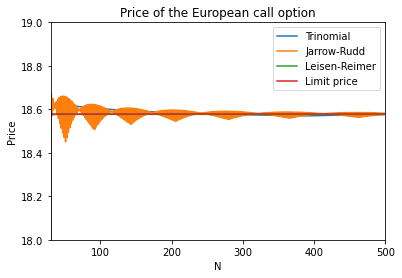

In [18]:
#EU option
Vtri=zeros(501)
Vjr=zeros(501)
Vlr=zeros(501)
for k in range(30,501):
    Vtri[k]=Eu_trinomial(S0,E,T,r,DividendYield,sigma,N=k)
    Vjr[k]=Eu_jr(S0=S0,E=E,T=T,N=k,r=r,sigma=sigma)
    Vlr[k]=Eu_lr(S0=S0,E=E,T=T,N=k,r=r,sigma=sigma)
VP=V_call*ones(501)
n = linspace(0, 500, 501)
plt.plot(n, Vtri)
plt.plot(n, Vjr)
plt.plot(n, Vlr)
plt.plot(n,VP)
plt.xlim((30, 500))
plt.ylim((18,19))
plt.ylabel('Price')
plt.xlabel('N')
plt.legend(['Trinomial', 'Jarrow-Rudd', 'Leisen-Reimer', 'Limit price'], loc='best')
plt.title('Price of the European call option')
plt.show()

<ipython-input-19-7b613068f93c>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Vtri_american=zeros(501)
<ipython-input-19-7b613068f93c>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Vjr_american=zeros(501)
<ipython-input-19-7b613068f93c>:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  Vlr_american=zeros(501)
<ipython-input-5-b372841395c9>:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  D=exp(rho*dt-sigma*sqrt(dt))
<ipython-input-5-b372841395c9>:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  D=exp(rho*dt-sigma*sqrt(dt))
<ipython-input-5-b372841395c9>:13: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt inste

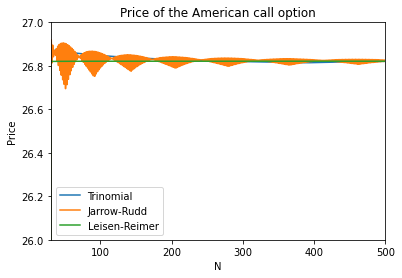

In [19]:
#American option 
Vtri_american=zeros(501)
Vjr_american=zeros(501)
Vlr_american=zeros(501)
for k in range(30,501):
    Vtri_american[k]=American_trinomial(S0,E,T,r,DividendYield,sigma,N=k)
    Vjr_american[k]=Americ_jr(S0=S0,E=E,T=T,N=k,r=r,sigma=sigma)
    Vlr_american[k]=Americ_lr(S0=S0,E=E,T=T,N=k,r=r,sigma=sigma)
n = linspace(0, 500, 501)
plt.plot(n, Vtri_american)
plt.plot(n, Vjr_american)
plt.plot(n, Vlr_american)
plt.xlim((30, 500))
plt.ylim((26,27))
plt.ylabel('Price')
plt.xlabel('N')
plt.legend(['Trinomial', 'Jarrow-Rudd', 'Leisen-Reimer'], loc='best')
plt.title('Price of the American call option')
plt.show()